# Intro to ML Project
## Goal: Show effects of platform, genre, and publisher on video game sales
*platform limited to PS systems, XB, and the PC*

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#read in data and verify
names = ['Rank','Name', 'Platform', 'Year', 'Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
df = pd.read_csv('vgsales2.csv', header=None,delim_whitespace=False,names=names,na_values='?')
df.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [20]:
df.shape

(16598, 11)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [37]:
#drop all rows with empty slots
df = df.dropna()

In [38]:
df.shape

(16291, 11)

In [48]:
df.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


# Seperate data by platform
## Platforms: PS (PS,PS2,PS3), XB, PC

In [39]:
dfXB = df[df.Platform == 'XB']

In [40]:
dfXB.shape

(803, 11)

In [41]:
dfXB.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
79,80,Halo 2,XB,2004.0,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,8.49
129,130,Halo: Combat Evolved,XB,2001.0,Shooter,Microsoft Game Studios,4.98,1.30,0.08,0.07,6.43
464,465,Tom Clancy's Splinter Cell,XB,2002.0,Action,Ubisoft,1.85,1.04,0.00,0.13,3.02
507,508,The Elder Scrolls III: Morrowind,XB,2002.0,Role-Playing,Ubisoft,2.09,0.63,0.03,0.11,2.86
568,569,Fable,XB,2004.0,Role-Playing,Microsoft Game Studios,1.99,0.58,0.00,0.09,2.66
617,618,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003.0,Action,Take-Two Interactive,1.84,0.56,0.00,0.09,2.49


In [42]:
dfPC = df[df.Platform == 'PC']
dfPC.shape

(938, 11)

In [43]:
dfPC.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.0,0.71,8.11
137,138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,6.21,0.0,0.00,6.28
181,182,Diablo III,PC,2012.0,Role-Playing,Activision,2.43,2.15,0.0,0.62,5.20
194,195,Microsoft Flight Simulator,PC,1996.0,Simulation,Microsoft Game Studios,3.22,1.69,0.0,0.20,5.12
217,218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.56,1.68,0.0,0.59,4.83
267,268,Warcraft II: Tides of Darkness,PC,1995.0,Strategy,Activision,1.70,2.27,0.0,0.23,4.21


In [44]:
dfPS = df[df.Platform == 'PS']
dfPS.shape

(1189, 11)

In [45]:
dfPS.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
52,53,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
66,67,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
69,70,Gran Turismo 2,PS,1999.0,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49
87,88,Final Fantasy VIII,PS,1999.0,Role-Playing,SquareSoft,2.28,1.72,3.63,0.23,7.86
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
105,106,Tekken 3,PS,1998.0,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16


In [46]:
dfPS2 = df[df.Platform == 'PS2']
dfPS2.shape

(2127, 11)

In [47]:
dfPS2.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
47,48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
86,87,Final Fantasy X,PS2,2001.0,Role-Playing,Sony Computer Entertainment,2.91,2.07,2.73,0.33,8.05


In [34]:
dfPS3 = df[df.Platform == 'PS3']
dfPS3.shape

(1329, 11)

In [35]:
dfPS3.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
54,55,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
55,56,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.69,0.38,1.63,10.69


In [56]:
df2 = pd.concat([dfXB,dfPC,dfPS,dfPS2,dfPS3])

In [57]:
df2.shape

(6386, 11)

In [59]:
df2.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
79,80,Halo 2,XB,2004.0,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,8.49
129,130,Halo: Combat Evolved,XB,2001.0,Shooter,Microsoft Game Studios,4.98,1.30,0.08,0.07,6.43
464,465,Tom Clancy's Splinter Cell,XB,2002.0,Action,Ubisoft,1.85,1.04,0.00,0.13,3.02
507,508,The Elder Scrolls III: Morrowind,XB,2002.0,Role-Playing,Ubisoft,2.09,0.63,0.03,0.11,2.86
568,569,Fable,XB,2004.0,Role-Playing,Microsoft Game Studios,1.99,0.58,0.00,0.09,2.66
617,618,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003.0,Action,Take-Two Interactive,1.84,0.56,0.00,0.09,2.49


In [61]:
#put data into array and delete first row
platform = np.array(df2['Platform'])
genre = np.array(df2['Genre'])
publisher = np.array(df2['Publisher'])
US = np.array(df2['NA_Sales'])
EU = np.array(df2['EU_Sales'])
Global = np.array(df2['Global_Sales'])
year = np.array(df2['Year'])

# Display Information

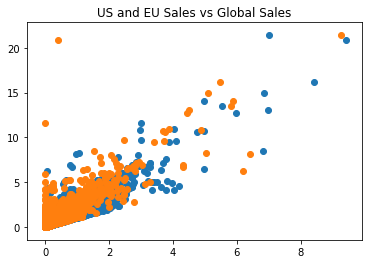

In [65]:
plt.scatter(US, Global, label="US")
plt.scatter(EU, Global, label="EU")
plt.title("US and EU Sales vs Global Sales")

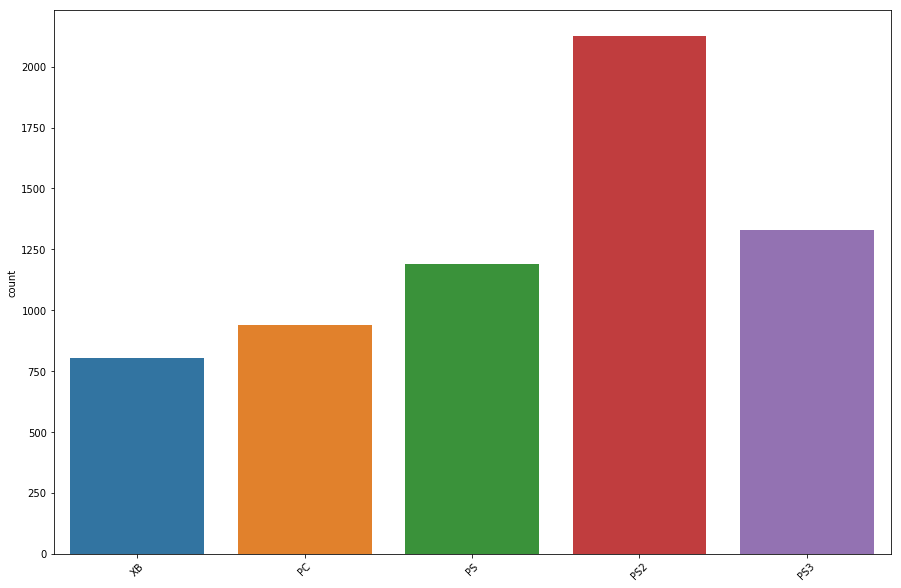

In [67]:
import seaborn as sns
#display platform
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(platform)

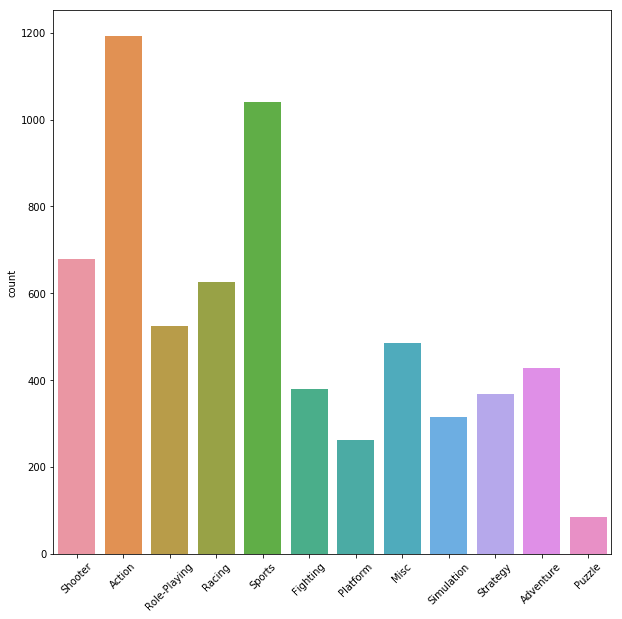

In [68]:
#display genre
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.countplot(genre)

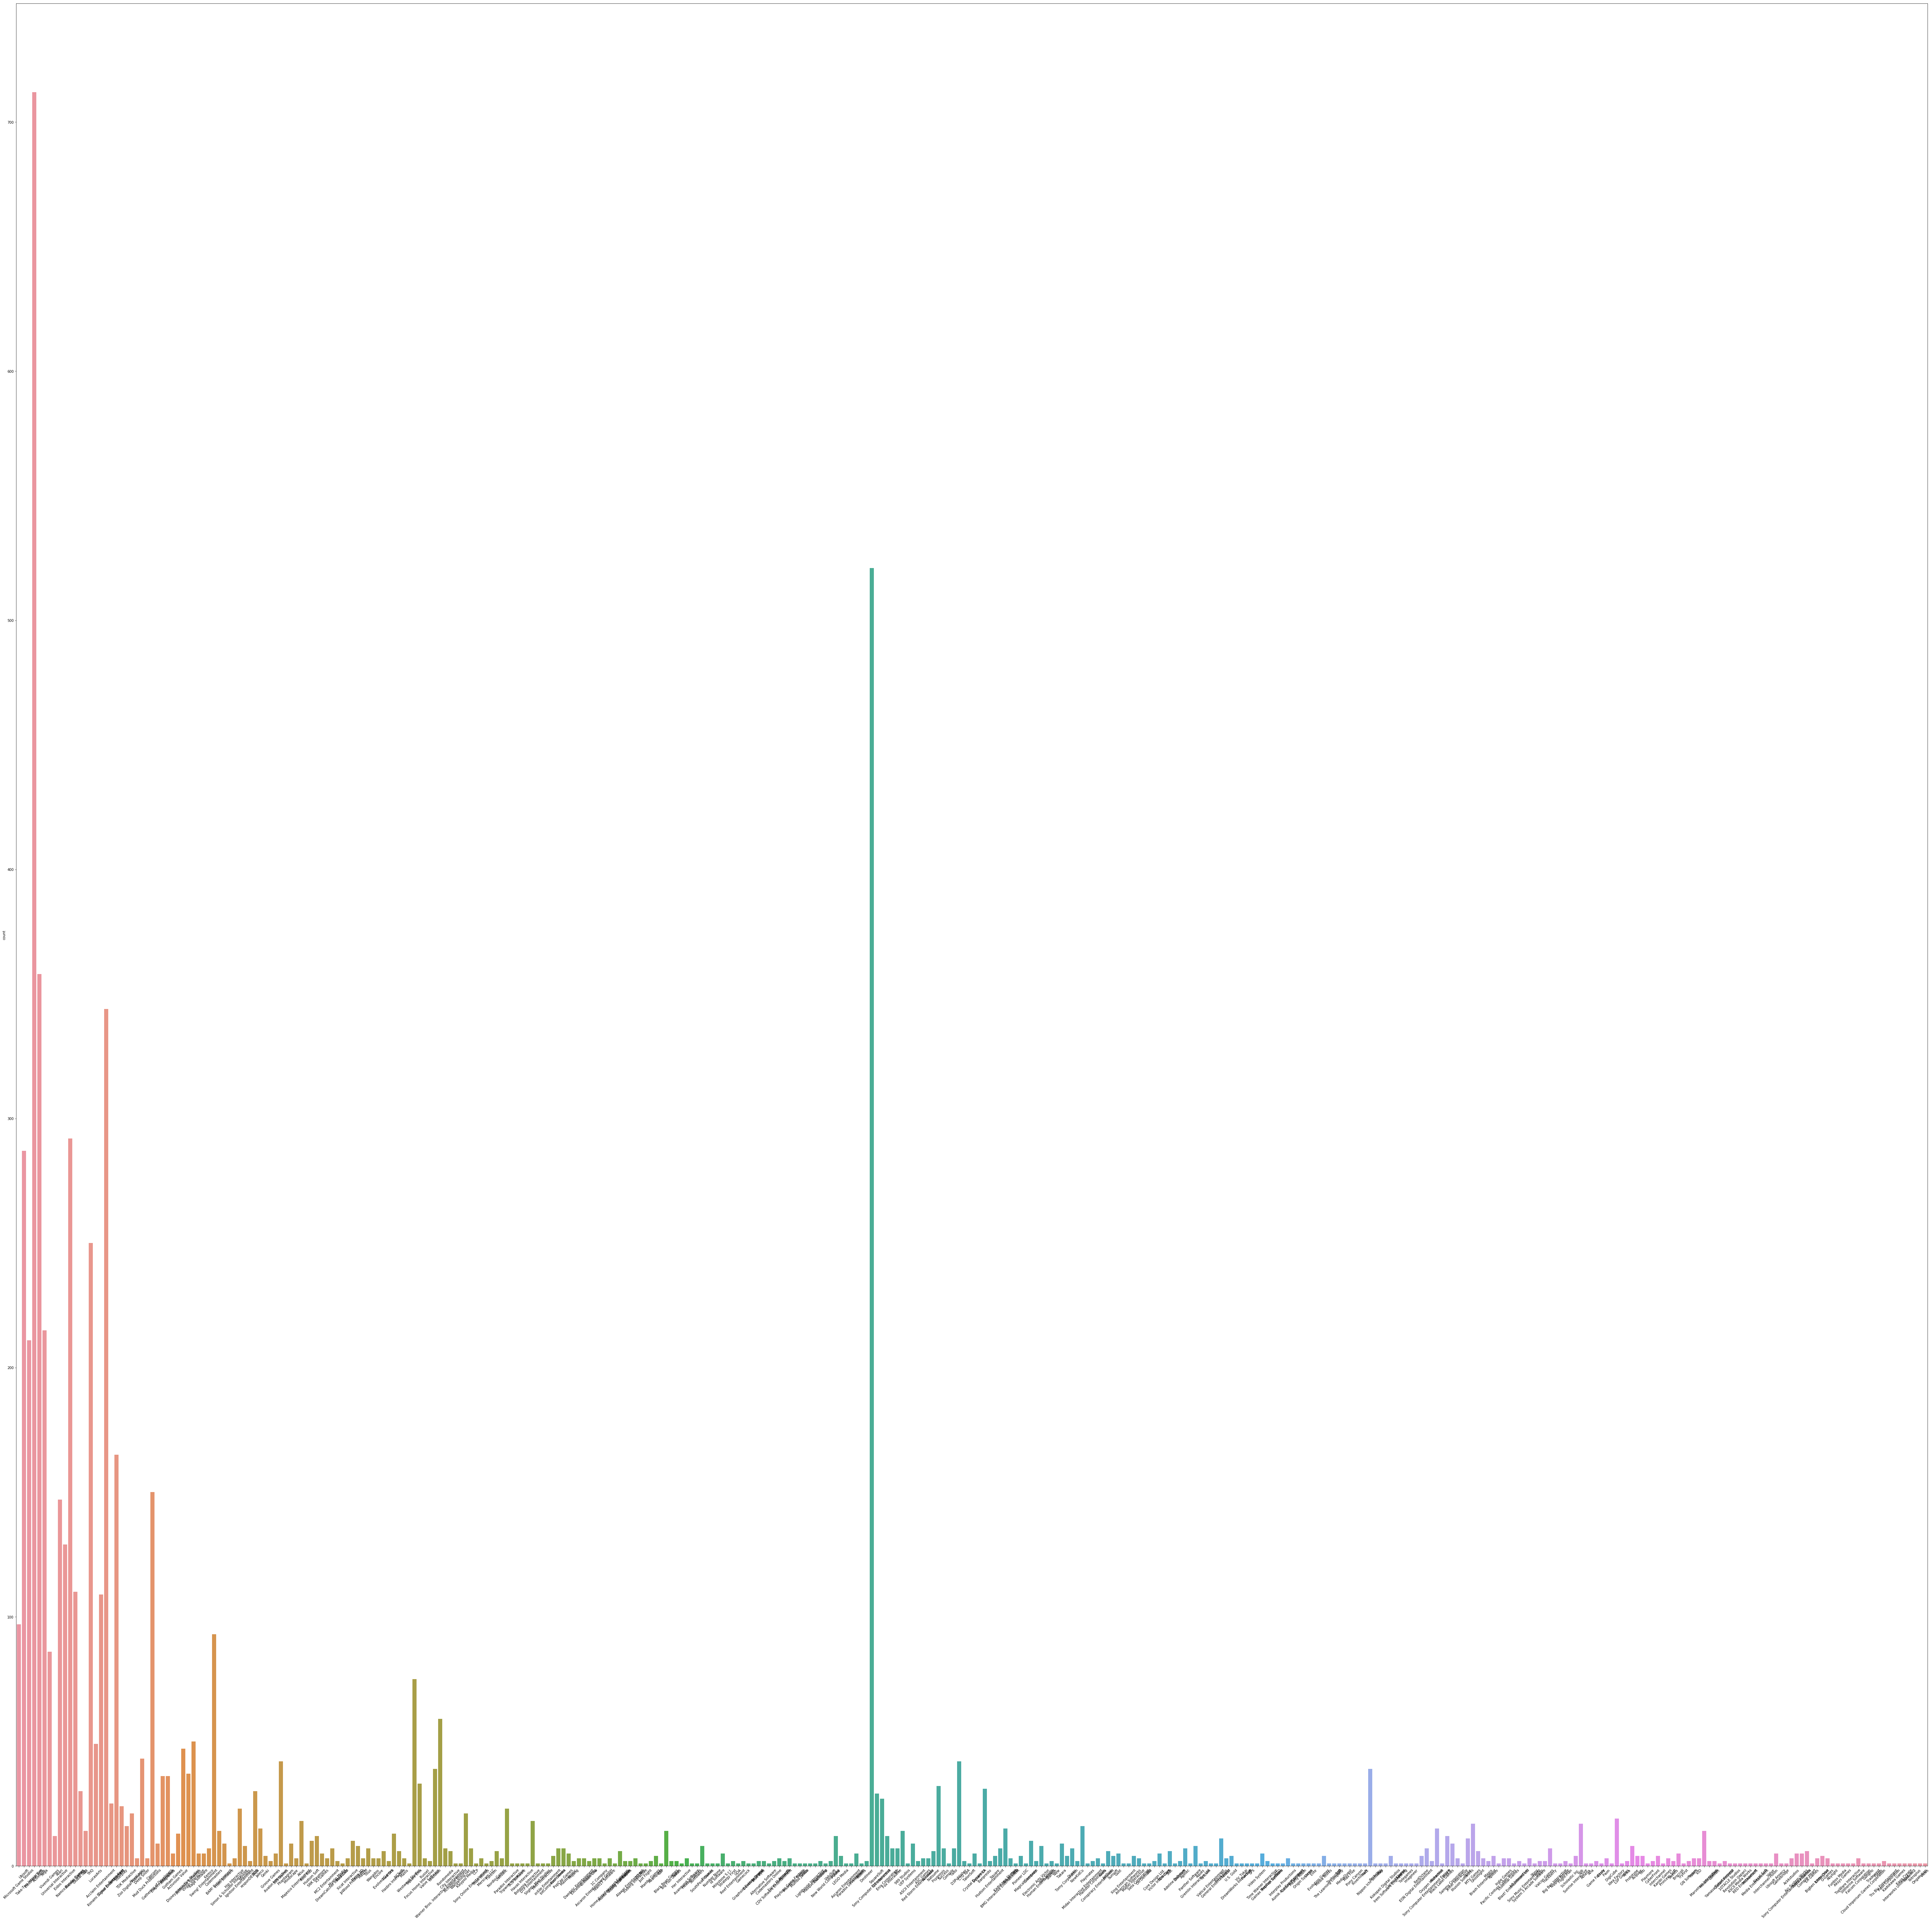

In [69]:
# display publisher
plt.figure(figsize=(100,100))
plt.xticks(rotation=45)
sns.countplot(publisher)

# Show impact on US vs EU sales

In [ ]:
plt.subplots(figsize=(15,10))
sns.barplot(x_platform, y_US, hue = y_EU)

# Train data using linear regression

# Model Order Method